In [1]:
import random                            # 무작위로 난수를 생성하는 함수
import numpy as np                       # 숫자관련 클래스들이 저장된 numpy 라이브러리를 np라고 부르겠다
import matplotlib.pyplot as plt          # 데이터를 시각화하기 위해서


        # 주식(Stock) 클래스를 생성
class Stock:
    def __init__(self, stock_price, expected_return, volatility, dividend, net_income, issued_shares, sales):
        self.S    = stock_price           # 주가
        self.ret  = expected_return       # (1년간) 기대수익률
        self.vol  = volatility            # (1년간) 변동성
        self.D = dividend                 # 배당금
        self.NI = net_income              # 당기순이익
        self.issued = issued_shares       # 발행 주식 수
        self.sales = sales                # 매출
        
        
        
         # T 년후 주가를 리턴하는 함수        
    def stock_price_move(self, T, seed, size=1):         # size = 1 : 만약 size를 입력하지 않았을 때 자동적으로 size =1 이 나오도록 하기 위해서 
        x = self.ret - 0.5 * self.vol ** 2               # ** 2 : 제곱을 나타냄
        y = self.vol * np.sqrt(T)                        # numpy를 활용해서 루트 표현하기 : sqrt
        np.random.seed(seed)                             # seed 값은 난수 생성하기위해 사용됨
        z = np.random.normal(0, 1, size = size)          # 표준정규분포 N(0,1)로부터 난수를 생성하는 함수
                                                         # size의 인자의 이름과 변수의 이름을 구분하기 위해서 (size = size)
        future_price = self.S * np.exp(x * T + y * z)    
        return future_price                             # 반환된 값을 다른 변수나 함수의 인자로 사용할 수 있기 때문에 return 사용(print 대신)
    
    
    
         # 샘플 n개의 표준평균, 표준분산 리턴하는 함수
    def sample_statistice(self, T, seed, n):             
        prices = self.stock_price_move(T, seed, size=n)
        sample_mean = np.mean(prices)                    # 평균을 계산하는 함수
        sample_variance = np.var(prices, ddof=1)         # 분산을 계산하는 함수 ; 표준분산 : (ddof = 1)
        print("Sample Mean:",sample_mean)
        print("Sample Variance:", sample_variance)
    
    
    
        # 이론상의 평균과 분산을 리턴하는 함수 (size가 커질수록 값이 비슷해지는지 확인하기 위해서)
    def theoretical_statistice(self, T):                
        theory_mean = self.S * np.exp(self.ret * T)
        theory_variance = self.S**2 * np.exp(2*self.ret*T)*(np.exp(self.vol**2 * T) - 1)
        print("Theoretical Mean:", theory_mean)
        print("Theoretical Variance:", theory_variance)
    
    
    
    def dividend_payout_ratio(self):                    # 베당성향률
        return self.D / self.NI
    
    def dividend_yield(self):                           # 배당수익률
        return self.D / self.S
    
    def PSR(self):                                      # PSR
        return self.S / (self.sales / self.issued)
    
    
        # 1년도 부터 T년 후까지의 주가의 변동(표본 집단에서)
    def plot_price_change(self, T, seed):
        years = range(1, T+1)
        prices = []
        for year in years:
            price = self.stock_price_move(year, seed=seed)
            prices.append(price)
            
        # plt.plot : 그래프를 그리는 함수
        # plt.plot(x, y, format) : x,y는 축을 나타내고, format은 그래프의 스타일을 지정함 
        
        plt.plot(years, prices, 'r.')       # 좌표의 점들을 빨간색으로
        plt.plot(years, prices, 'g-')       # 좌표의 점들을 이은 선을 초록색으로
        plt.xlabel('Year')                  # x축의 이름을 지정해줌
        plt.xticks(range(1, T+1))           # x축의 눈금을 1부터 T까지 눈금설정
        plt.ylabel('Stock Price')           # y축의 이름을 지정해줌
        plt.title('Stock Price Change Over Time')    # 그래프의 title을 지정해줌
        plt.grid(True)                      # 그래프에 격자를 표시함 (False하면 격자가 사라짐)
        plt.show()                          # 그래프를 화면에 표시하는 함수
        

In [2]:
# 샘플에서 구한 평균과 표본분산이 size가 커질때 이론상의 값에 수렴하는지 확인해보기
S = Stock(10000, 0.08, 0.2, 500, 2000, 100000, 50000)
S.theoretical_statistice(5)
print("="*30)
S.sample_statistice(5, 835, 100)
print("-"*30)
S.sample_statistice(5, 835, 10000)

Theoretical Mean: 14918.246976412704
Theoretical Variance: 49274089.996657774
Sample Mean: 14379.907980980177
Sample Variance: 38264064.40929168
------------------------------
Sample Mean: 14914.936229294353
Sample Variance: 49797352.20637351


Future Price: [20062.81057235  8590.95009885  7644.29403926 32611.99226259
 11950.8349467  21110.61646433 15292.20563572 13839.07087643
  6667.52842423 12876.22033432]
Sample Mean: 14916.213959608433
Sample Variance: 49260127.33737323
Theoretical Mean: 14918.246976412704
Theoretical Variance: 49274089.996657774
Dividend Payout Ratio: 0.25
Dividend Yield: 0.05
Price to Sales Ratio (PSR): 20000.0


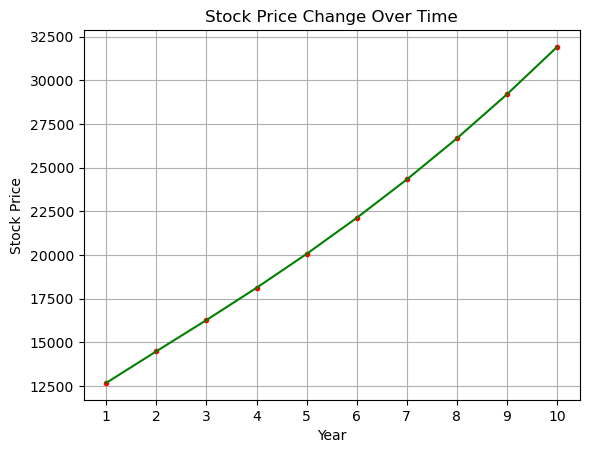

In [3]:
S = Stock(10000, 0.08, 0.2, 500, 2000, 100000, 50000)

future_price = S.stock_price_move(5, 835, 10)
print("Future Price:", future_price)

S.sample_statistice(5, 835, 10000000)


S.theoretical_statistice(5)


dividend_payout_ratio = S.dividend_payout_ratio()
print("Dividend Payout Ratio:", dividend_payout_ratio)

dividend_yield = S.dividend_yield()
print("Dividend Yield:", dividend_yield)

PSR = S.PSR()
print("Price to Sales Ratio (PSR):", PSR)

S.plot_price_change(10, 835)